# Comparison with APL library on OpenML benchmark datasets

In this notebook we will compare our library with official SAP HANA Automated Predictive Library (details here: https://help.sap.com/viewer/cb31bd99d09747089754a0ba75067ed2/2.5.0.0/en-US). In most cases, our library beats it in accuracy. However, there is always room for improvement. 

In [32]:
from hana_automl.utils.perfomance import Benchmark
from hana_automl.utils.connection import connection_context
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hana_automl.utils.cleanup import clean
%load_ext jupyternotify
import time

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [2]:
b = Benchmark(connection_context)
GRADIENT = False

In [ ]:
apl_acc = []
hana_acc = []
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv', 'adult.csv', 'blood.csv', 'sylvine.csv', 'credit.csv', 'kc1.csv']

In [28]:
df = pd.DataFrame()

In [29]:
def plot_results(task: str, boosting: bool):
    df['APL'] = apl_acc
    df['HANA AutoML'] = hana_acc
    df['Dataset'] = datasets
    x = np.arange(len(datasets))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, apl_acc, width, label='APL')
    rects2 = ax.bar(x + width/2, hana_acc, width, label='HANA AutoML')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    if boosting:
        ax.set_title(f'{task} (APL with Gradient Boosting)')
    else:
        ax.set_title(f'{task} (APL without Gradient Boosting)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()

    ax.bar_label(rects1)
    ax.bar_label(rects2)

    plt.gcf().set_size_inches(25,15)
    plt.style.use('default')
    plt.show()
    
def finish(benchmark):
    apl_acc.append(benchmark.apl_accuracy)
    hana_acc.append(benchmark.automl_accuracy)
    clean()
    time.sleep(180)
    
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Just APL, without Gradient Boosting enabled:
Don't know what is Gradient Boosting? Check here: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ . We are using special benchmark datasets from OpenML to compare model accuracy.

## Classification

In [ ]:
clean()
%%notify
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/adult.csv', task='cls', label='class', categorical=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class'], grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/blood.csv', task='cls', label='Class', categorical=['Class'], grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/sylvine.csv', task='cls', label='class', categorical=['class'], grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/credit.csv', task='cls', label='class', categorical=['class', 'checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'], grad_boost=GRADIENT)
finish(b)

In [ ]:
%%notify
b.run('./data/benchmark/cls/kc1.csv', task='cls', label='defects', categorical=['defects'], grad_boost=GRADIENT)
finish(b)

In [ ]:
plot_results(task='Classification', boosting=GRADIENT)

## Regression

In [23]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv', 'boston.csv', 'tecator.csv', 'space_ga.csv', 'pol.csv', 'socmob.csv']
hana_acc = []
apl_acc = []
clean()

REMOVED ALL TABLES FROM DEVELOPER


In [6]:
%%notify
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Finished in 9 seconds
APL accuracy:  0.838354448443124
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 287 seconds


100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


hana_automl accuracy: 0.8082410039860705
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [7]:
%%notify
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


Finished in 7 seconds
APL accuracy:  0.2040728871911958
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 500 seconds


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


hana_automl accuracy: 0.37570570896281674
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [8]:
%%notify
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.15it/s]


Finished in 6 seconds
APL accuracy:  0.9429537555468236
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 296 seconds


100%|██████████| 1/1 [00:00<00:00,  6.12it/s]


hana_automl accuracy: 0.8985225901981336
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [10]:
%%notify
b.run('./data/benchmark/reg/boston.csv', task='reg', label='MEDV', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


Finished in 6 seconds
APL accuracy:  0.6944069260640147
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 287 seconds


100%|██████████| 1/1 [00:00<00:00,  4.63it/s]


hana_automl accuracy: 0.8586095574928322
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [12]:
%%notify
b.run('./data/benchmark/reg/tecator.csv', task='reg', label='fat', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


Finished in 9 seconds
APL accuracy:  0.9932669018072373
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 403 seconds


100%|██████████| 1/1 [00:00<00:00,  4.32it/s]


hana_automl accuracy: 0.9925893911618557
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [13]:
%%notify
b.run('./data/benchmark/reg/space_ga.csv', task='reg', label='ln(VOTES/POP)', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


Finished in 6 seconds
APL accuracy:  0.6596651986785207
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 300 seconds


100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


hana_automl accuracy: 0.6003488762439733
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [19]:
%%notify
b.run('./data/benchmark/reg/pol.csv', task='reg', label='foo', grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:25<00:00, 25.83s/it]


Finished in 13 seconds
APL accuracy:  0.884573930795346
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [01:00<00:00, 60.95s/it]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 402 seconds


100%|██████████| 1/1 [00:02<00:00,  2.08s/it]


hana_automl accuracy: 0.9784654063567975
REMOVED ALL TABLES FROM DEVELOPER


<IPython.core.display.Javascript object>

In [ ]:
%%notify
b.run('./data/benchmark/reg/socmob.csv', task='reg', label='counts_for_sons_current_occupation', categorical=['fathers_occupation','sons_occupation', 'family_structure', 'race'],grad_boost=GRADIENT)
finish(b)

100%|██████████| 1/1 [00:00<00:00,  6.50it/s]


Finished in 5 seconds
APL accuracy:  0.7208346430605537
REMOVED ALL TABLES FROM DEVELOPER
Recreating table BENCHMARK_AUTOML with data from dataframe


100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


Task: reg
All iterations completed successfully!
Starting model accuracy evaluation on the validation data!
Finished in 305 seconds


100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


hana_automl accuracy: 0.9060617706328242
REMOVED ALL TABLES FROM DEVELOPER


APL ACCURACY [0.838354448443124, 0.2040728871911958, 0.9429537555468236, 0.6944069260640147, 0.9932669018072373, 0.6596651986785207, 0.884573930795346, -0.030590154971211092]
AutoML ACCURACY [0.8082410039860705, 0.37570570896281674, 0.8985225901981336, 0.8586095574928322, 0.9925893911618557, 0.6003488762439733, 0.9784654063567975, 0.016643173559747315]
8 8 8


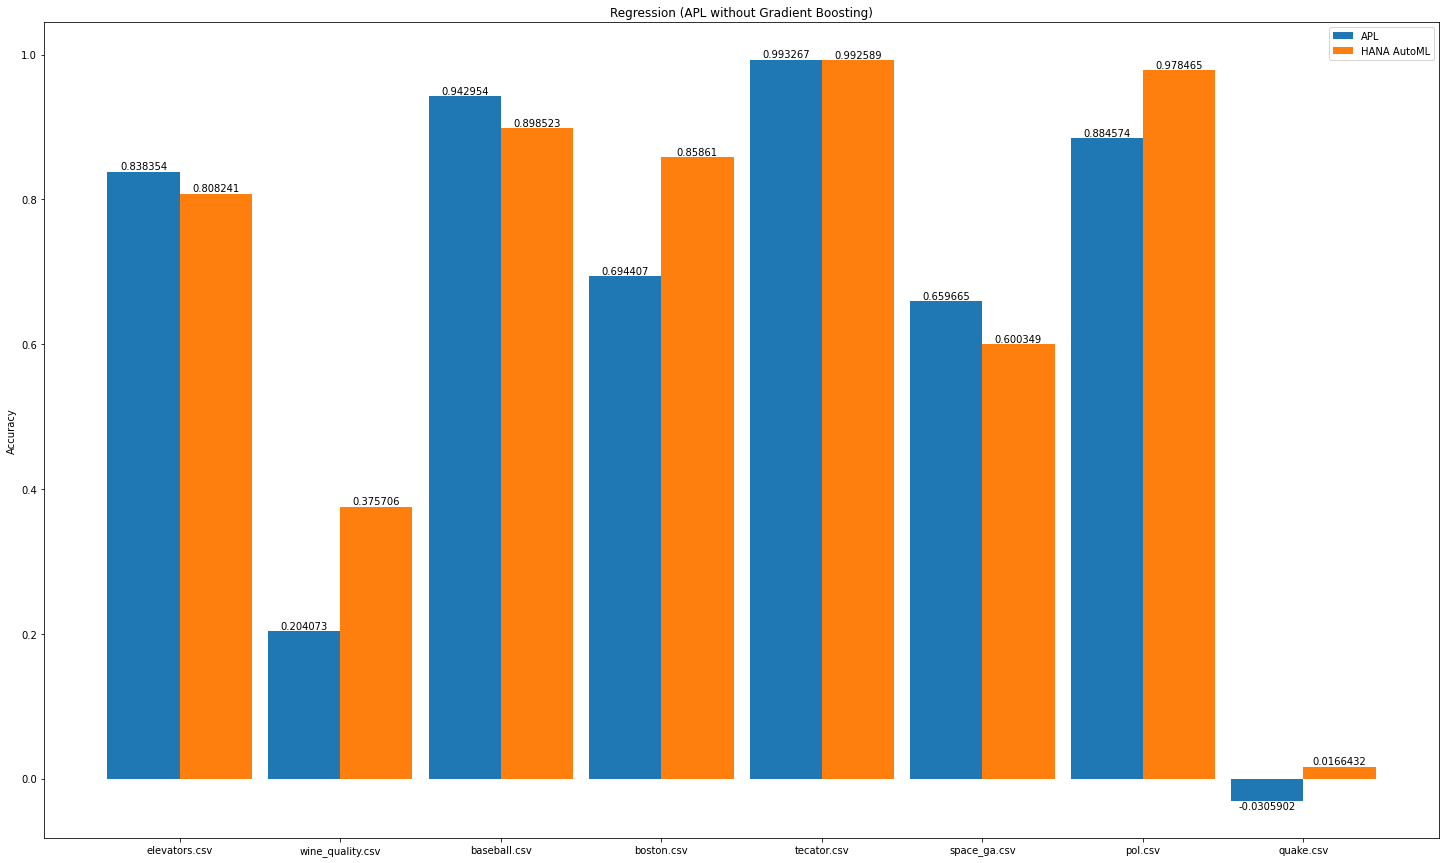

In [30]:
hana_acc = 0.8082410039860705, 0.37570570896281674, 0.8985225901981336, 0.8586095574928322, 0.9925893911618557, 0.6003488762439733, 0.9784654063567975, 0.7491696923294403]
apl_acc = [0.838354448443124, 0.2040728871911958, 0.9429537555468236, 0.6944069260640147, 0.9932669018072373, 0.6596651986785207, 0.884573930795346, -0.030590154971211092]

print('APL ACCURACY', apl_acc)
print('AutoML ACCURACY', hana_acc)
print(len(datasets), len(hana_acc), len(apl_acc))
plot_results(task='Regression', boosting=False)

## Gradient boosting enabled

## Classification

In [ ]:
datasets = ['kr-vs-kp.csv', 'australian.csv', 'phoneme.csv']
hana_acc = []
apl_acc = []

In [ ]:
# https://www.openml.org/d/3
b.run('./data/benchmark/cls/kr-vs-kp.csv', task='cls', label='class', categorical=['class'], grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/40981
b.run('./data/benchmark/cls/australian.csv', task='cls', 
      label='A15', 
      categorical=['A15', 'A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12'],
      grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/1489
b.run('./data/benchmark/cls/phoneme.csv', task='cls', label='Class', categorical=['Class'], grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
plot_results(task='Classification', boosting=True)

## Regression

In [ ]:
datasets = ['elevators.csv', 'wine_quality.csv', 'baseball.csv']
hana_acc = []
apl_acc = []

In [ ]:
# https://www.openml.org/d/216
b.run('./data/benchmark/reg/elevators.csv', task='reg', label='Goal', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/287
b.run('./data/benchmark/reg/wine_quality.csv', task='reg', label='quality', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
# https://www.openml.org/d/41021
b.run('./data/benchmark/reg/baseball.csv', task='reg', label='RS', grad_boost=True)
apl_acc.append(b.apl_accuracy)
hana_acc.append(b.automl_accuracy)

In [ ]:
plot_results(task='Regression', boosting=True)